# Data Science Project - Historical Cities Temperature

Analyzing the temperatures for American cities (https://www.kaggle.com/berkeleyearth/) could inform us on global warming. I plan to use Machine Learning to predict the future temperature, compare the result to the NASA NEX Climate data, and advise investors which city worth investing in the climate change context.

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [2]:
temperature_country = pd.read_csv('CityTemperature/GlobalLandTemperaturesByCity.csv')
temperature_country.info() #seeking the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [3]:
temp_us = temperature_country.loc[temperature_country["Country"] == 'United States'].dropna() # I am focusing my analysis on the USA

In [4]:
temp_us.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [5]:
#selecting 3 big cites, with different "climate"

temp_ny = temp_us.loc[temp_us["City"]== "New York"] 
temp_or = temp_us.loc[temp_us["City"]== "Orlando"] 
temp_mi = temp_us.loc[temp_us["City"]== "Minneapolis"] 
temp_ny

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5203973,1743-11-01,3.264,1.665,New York,United States,40.99N,74.56W
5203978,1744-04-01,9.788,2.151,New York,United States,40.99N,74.56W
5203979,1744-05-01,15.708,1.506,New York,United States,40.99N,74.56W
5203980,1744-06-01,21.210,1.455,New York,United States,40.99N,74.56W
5203981,1744-07-01,22.207,1.305,New York,United States,40.99N,74.56W
...,...,...,...,...,...,...,...
5207207,2013-05-01,15.544,0.281,New York,United States,40.99N,74.56W
5207208,2013-06-01,20.892,0.273,New York,United States,40.99N,74.56W
5207209,2013-07-01,24.722,0.279,New York,United States,40.99N,74.56W
5207210,2013-08-01,21.001,0.323,New York,United States,40.99N,74.56W


In [6]:
#adding new columns, day, month and year.
#I am no able to plot along the "year" column
temp_ny['dt'] =  pd.to_datetime(temp_ny['dt'])
temp_ny['day'] = temp_ny['dt'].dt.day
temp_ny['month'] = temp_ny['dt'].dt.month
temp_ny['year'] = temp_ny['dt'].dt.year

temp_or['dt'] =  pd.to_datetime(temp_or['dt'])
temp_or['day'] = temp_or['dt'].dt.day
temp_or['month'] = temp_or['dt'].dt.month
temp_or['year'] = temp_or['dt'].dt.year

temp_mi['dt'] =  pd.to_datetime(temp_mi['dt'])
temp_mi['day'] = temp_mi['dt'].dt.day
temp_mi['month'] = temp_mi['dt'].dt.month
temp_mi['year'] = temp_mi['dt'].dt.year
temp_mi.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,day,month,year
4836363,1743-11-01,-2.526,2.654,Minneapolis,United States,45.81N,93.46W,1,11,1743
4836368,1744-04-01,7.421,2.666,Minneapolis,United States,45.81N,93.46W,1,4,1744
4836369,1744-05-01,12.345,2.344,Minneapolis,United States,45.81N,93.46W,1,5,1744
4836370,1744-06-01,18.507,2.156,Minneapolis,United States,45.81N,93.46W,1,6,1744
4836371,1744-07-01,20.439,2.028,Minneapolis,United States,45.81N,93.46W,1,7,1744


<AxesSubplot:xlabel='year', ylabel='AverageTemperature'>

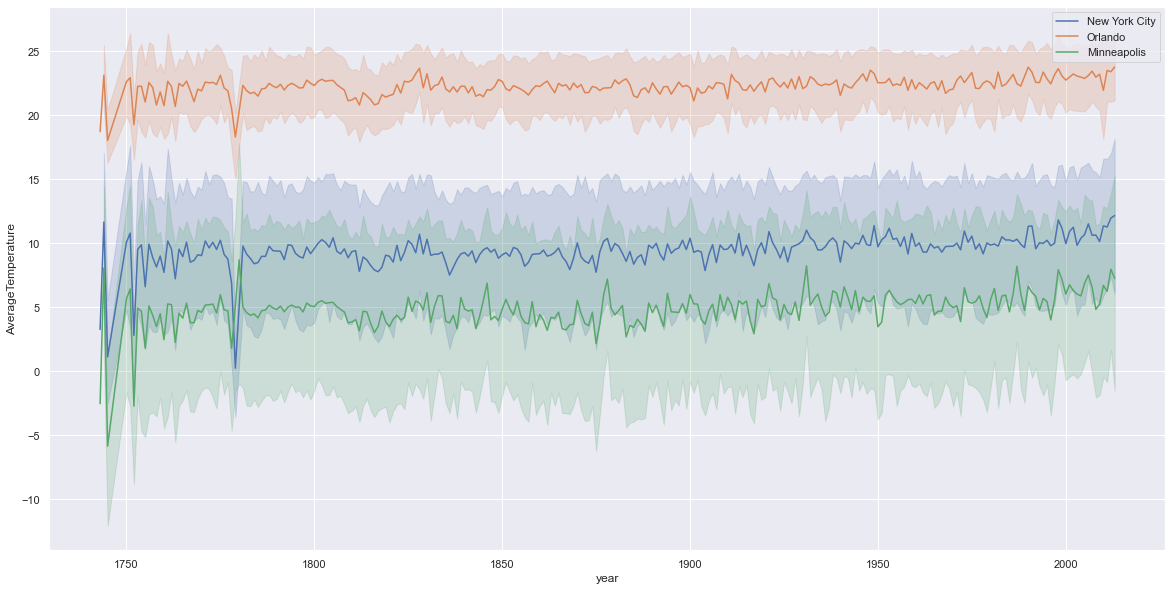

In [7]:
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10] #bigger plot window
sns.lineplot(data=temp_ny,x='year', y='AverageTemperature',err_style="band",label = 'New York City')
sns.lineplot(data=temp_or,x='year', y='AverageTemperature',err_style="band",label = 'Orlando')

sns.lineplot(data=temp_mi,x='year', y='AverageTemperature',err_style="band",label = 'Minneapolis')


From these data set, I can conduct ML experiments to predict the future temperature and compare the results to the NASA NEX climate data.